final error rate is: 0/10
final weight 1 = [-0.26232868]
final weight 2 : [-0.37981483]


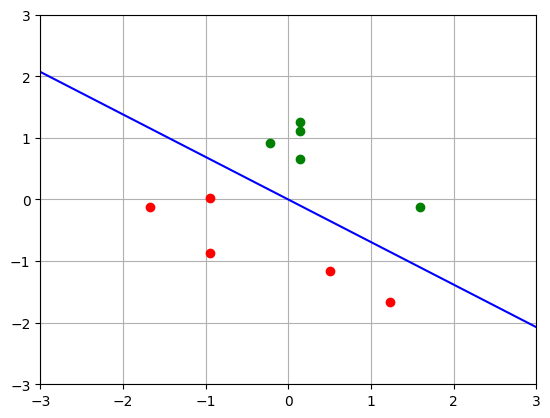

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


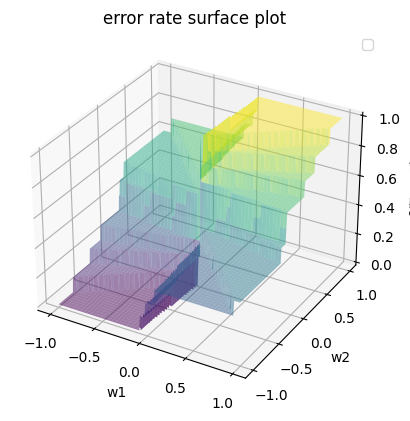

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import Normalize


# fleshed out method header you provided to calculate error rate for 'all possible' values of w1 and w2
def function_error_rate(W1, W2, datasetX, datasetY):
    error_rates = np.zeros((len(W1), len(W2)))
    errors = 0

    # the below section is for looping over all possibilities for the error rates
    # I really didn't understand these data structures or matplotlibs/numpy functions so I think this is really sloppy
    for i, w1 in enumerate(W1):
        for j, ww1 in enumerate(w1):
            for k, item in enumerate(datasetX):
                y_pred = np.sign(ww1 * item[0] + W2[i][j] * item[1])
                if y_pred != datasetY[k]:
                    errors += 1
            error_rates[i, j] = errors / 10
            errors = 0
    return error_rates


# method provided by you in class
def plot_function_on_grid(function_to_plot, datasetX, datasetY):
    # Create a meshgrid
    w1 = np.arange(-1, 1, 0.01)
    w2 = np.arange(-1, 1, 0.01)
    W1, W2 = np.meshgrid(w1, w2)
    error_rates_values_for_W1W2 = function_to_plot(W1, W2, datasetX, datasetY)
    # Create a figure and a 3D axis
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    # Create the surface plot
    surface = ax.plot_surface(W1, W2, error_rates_values_for_W1W2, cmap='viridis', alpha=0.5)
    # Add labels and title
    ax.set_xlabel('w1')
    ax.set_ylabel('w2')
    ax.set_zlabel('error rate')
    ax.set_title('error rate surface plot')
    return ax


# this is a method I made for reading in the data from csv
def read_file(filename):
    df = pd.read_csv(filename, index_col='SampleName')
    car_col = df['IsCar']
    car_col.replace(to_replace=0, value=-1, inplace=True)
    suv_col = df['IsSUV']
    suv_col.replace(to_replace=0, value=-1, inplace=True)
    return df


def main():
    # this section is reading in and making my datastructures
    df = read_file('carSUV_normalized.csv')
    myDataAsNumpyMatrix = df[['ZeroToSixty', 'PowerHP']].to_numpy()
    data_matrix_for_graphs = df.to_numpy()
    is_car_array = df[['IsCar']].to_numpy()

    # some variable declarations
    learning_rate = 0.1
    w = np.ones((2, 1))
    errors = 0

    # this is the epochs running, so it runs through the dataset x times
    for number_of_runs in range(5):

        errors = 0
        for i, p in enumerate(myDataAsNumpyMatrix):

            x = np.array([[p[0], ], [p[1], ]])

            wT = np.transpose(w)

            wTx = np.matmul(wT, x)

            wTxAsNumber = np.squeeze(wTx)
            y_prediction = np.sign(wTxAsNumber)

            if y_prediction != is_car_array[i]:
                w = w + learning_rate * (is_car_array[i] - y_prediction) * x
                errors += 1
            # else:
            #     pass
            #     # print('prediction success')

    # this section prints the final errors out of 10 (error rate) and the weights used
    print('final error rate is:', str(errors) + '/10')
    print('final weight 1 =', w[0])
    print('final weight 2 :', w[1])

    # this is the first plot with red and green dots
    plt.figure()
    plt.xlim([-3, 3])
    plt.ylim([-3, 3])
    plt.grid(True, which="both", axis="both")
    x = np.linspace(-3, 3, 100)
    y = -1 * w[0] / w[1] * x
    plt.plot(x, y, color="blue")
    for item in data_matrix_for_graphs:

        if item[3] > 0:
            plt.plot(item[0], item[1], marker="o", color='green')
        else:
            plt.plot(item[0], item[1], marker="o", color='red')
    plt.show()


    # this function makes the second graph showing error rates for all w1 and w2 value combinations
    ax = plot_function_on_grid(function_error_rate, myDataAsNumpyMatrix, is_car_array)
    plt.legend()
    plt.show()


if __name__ == "__main__":
    main()